In [12]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
# Set up S3 import
!pip install boto3
import boto3

BUCKET_NAME = 'ecommerce-machine-learning-resources-5.29.23'

from config import aws_access_key_id, aws_secret_access_key, region

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
# Authentication credentials for S3
s3 = boto3.resource('s3',aws_access_key_id = aws_access_key_id, aws_secret_access_key = aws_secret_access_key)
KEY = 'cleaned_data.csv'
# Import file
s3.Bucket(BUCKET_NAME).download_file(KEY,'cleaned_data.csv')

In [15]:
# Read CSV into DataFrame
df = pd.read_csv('cleaned_data.csv',index_col=0)
df.set_index("CustomerID",inplace=True)
df

,Churn,Tenure,PreferredLoginDevice,PreferredPaymentMode,Gender,AppHours,RegisteredDevices,PreferredCategory,SatisfactionScore,MaritalStatus,...,OrderIncreasePercent,CouponsUsed,OrderCount,DaysSinceOrder,AverageCashback,State,Age,Race,HouseholdIncome,PersonalIncome
CustomerID,,,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,...,11.0,1.0,1.0,5.0,160,California,75,White,17334.97,17334.97
50004,1,0.0,Phone,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,...,23.0,0.0,1.0,3.0,134,Pennsylvania,24,White,203600.87,37389.14
50006,1,0.0,Computer,Debit Card,Female,3.0,5,Mobile Phone,5,Single,...,22.0,4.0,6.0,7.0,139,Mississippi,32,Black,2379.31,2379.31
50012,1,11.0,Mobile Phone,Debit Card,Male,3.0,4,Fashion,3,Single,...,13.0,0.0,1.0,0.0,154,New York,83,White,26461.31,26461.31
50013,1,0.0,Phone,COD,Male,2.0,3,Mobile,3,Single,...,13.0,2.0,2.0,2.0,134,Washington,39,American Indian or Alaska Native,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55625,0,1.0,Mobile Phone,UPI,Female,2.0,5,Mobile Phone,3,Single,...,19.0,2.0,2.0,1.0,155,Louisiana,93,White,13766.00,13766.00
55626,0,10.0,Computer,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,...,18.0,1.0,2.0,4.0,151,North Carolina,25,Black,64581.24,47586.18
55628,0,1.0,Mobile Phone,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,...,21.0,1.0,2.0,4.0,186,Texas,46,White,85026.30,51036.18


In [16]:
# Create variables
cols = ['Tenure', 'PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',	'AppHours',	'RegisteredDevices',	'PreferredCategory',	'SatisfactionScore',	'MaritalStatus',	'OrderIncreasePercent',	'CouponsUsed',	'OrderCount',	'DaysSinceOrder',	'AverageCashback',	'State',	'Age',	'Race',	'HouseholdIncome',	'PersonalIncome', 'Churn']
churn =['Active', 'Inactive']

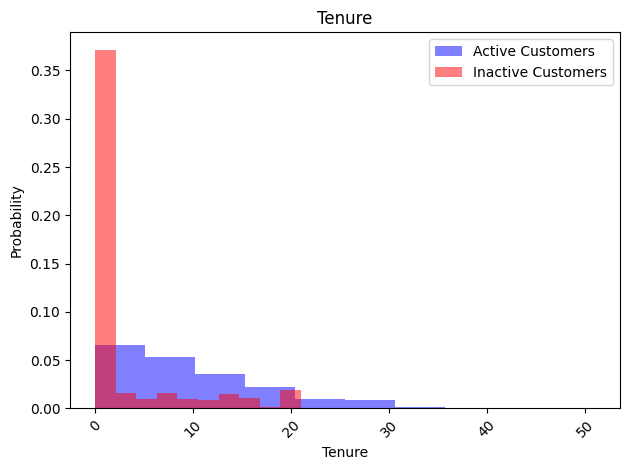

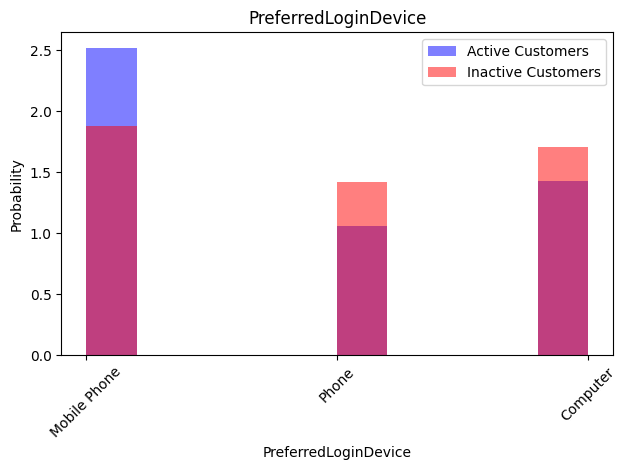

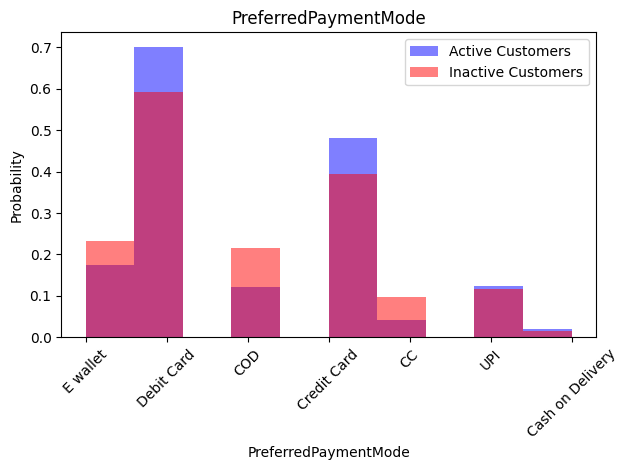

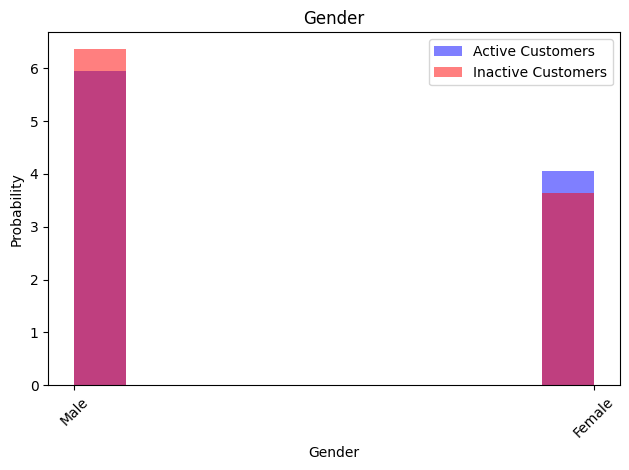

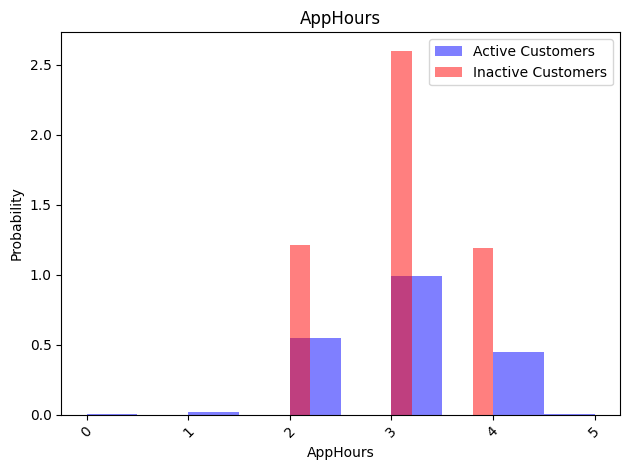

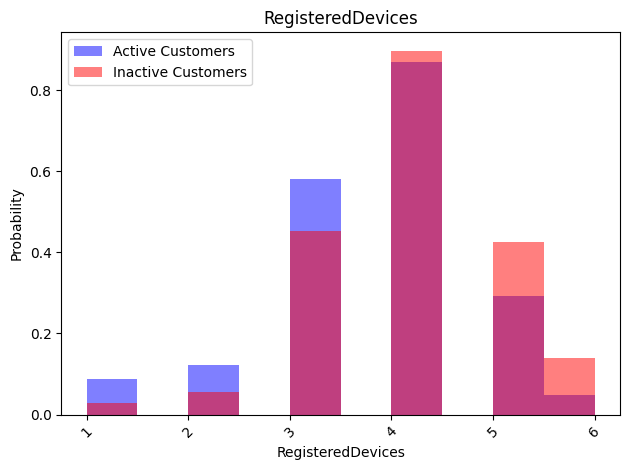

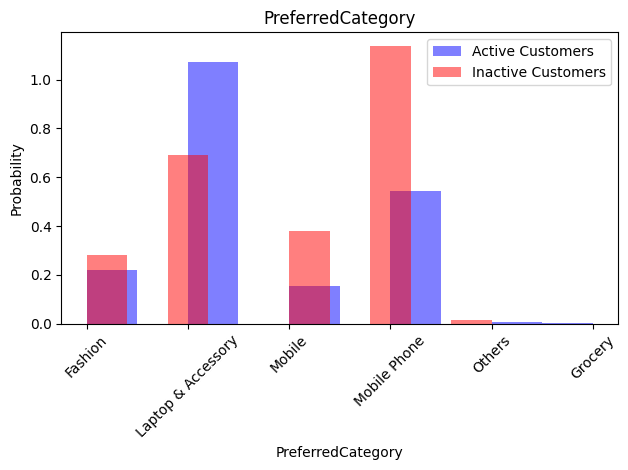

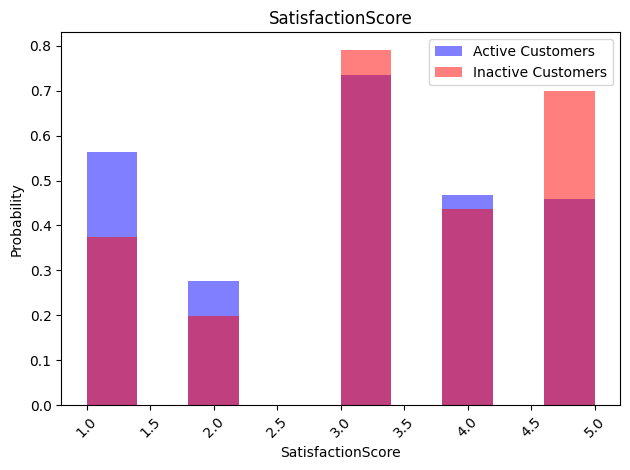

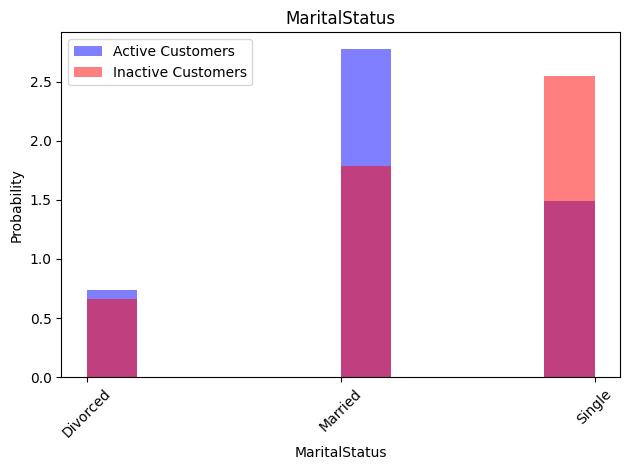

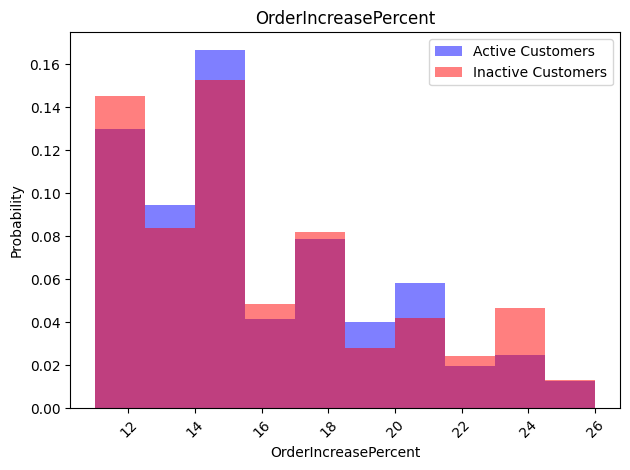

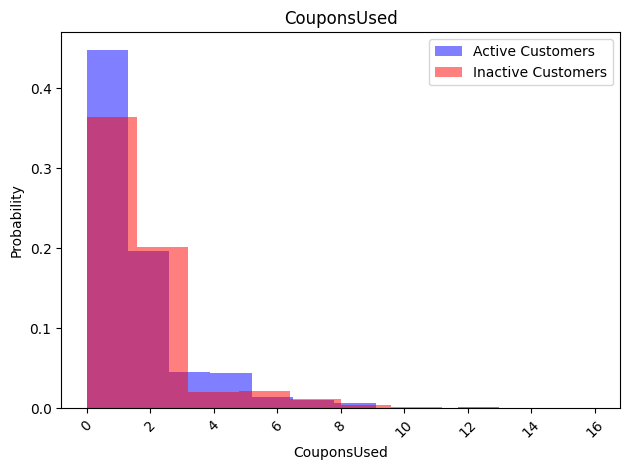

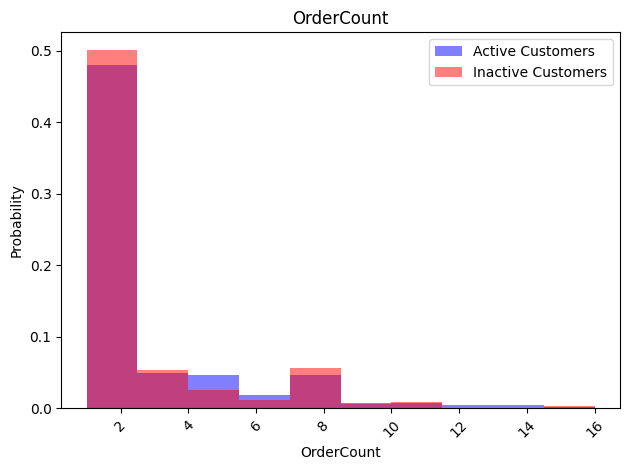

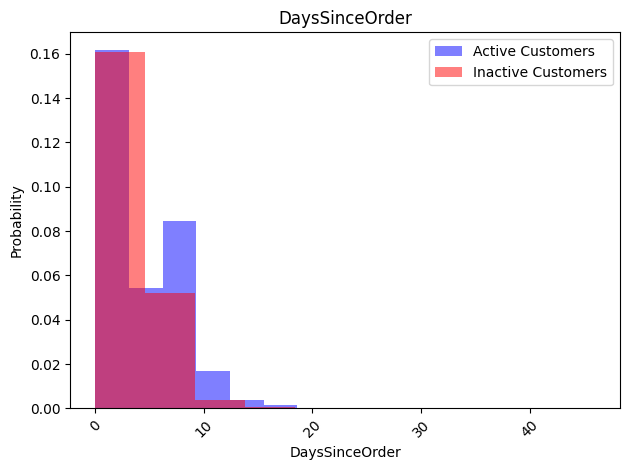

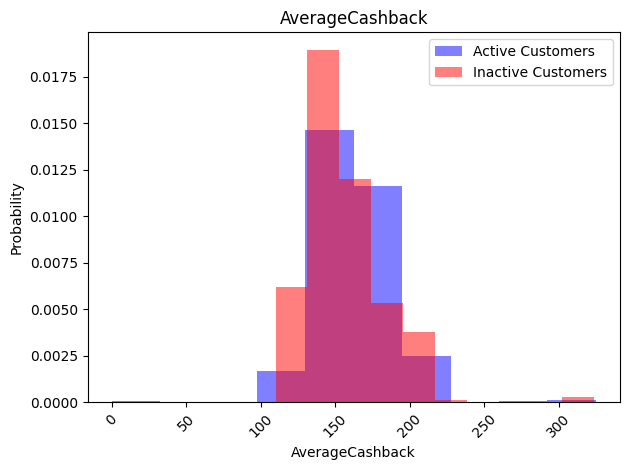

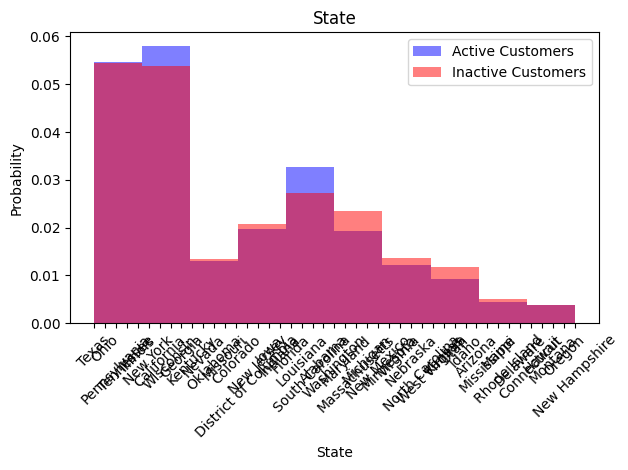

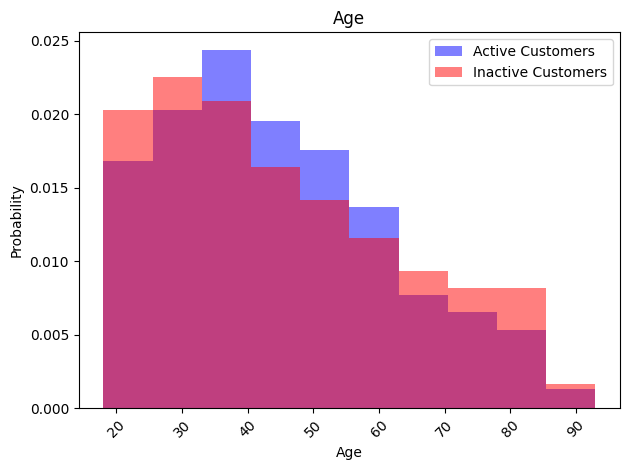

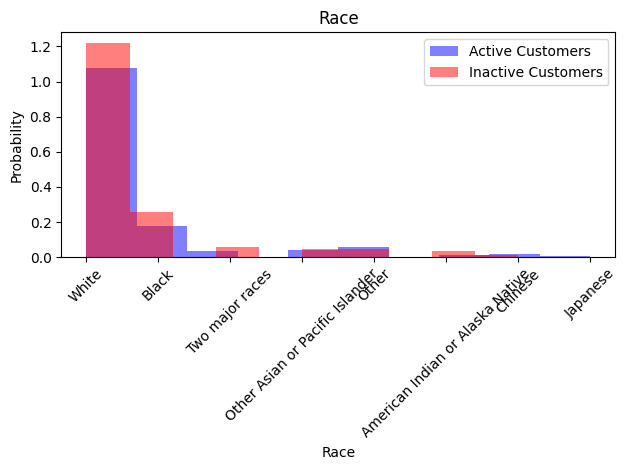

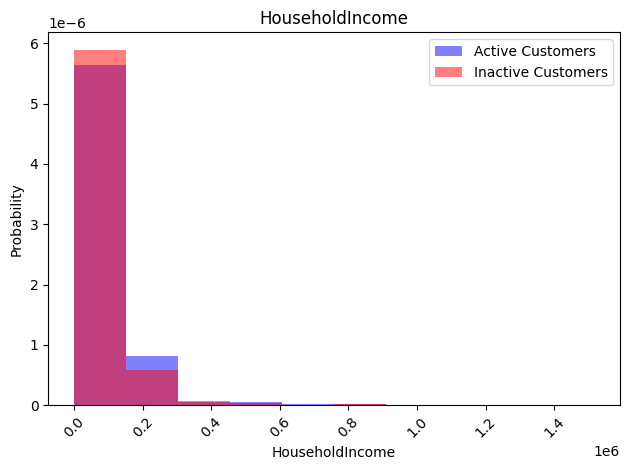

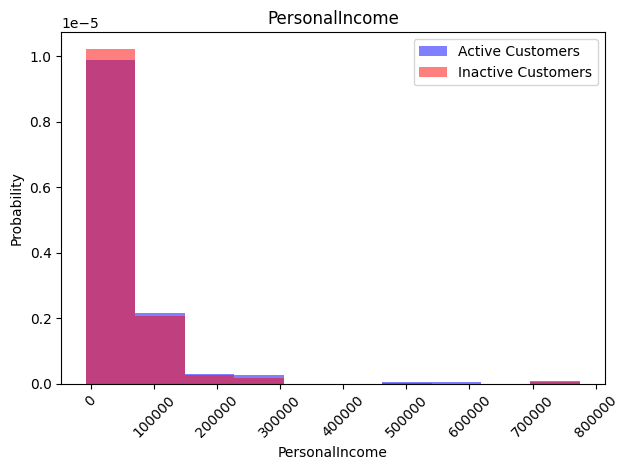

In [11]:
# Graphically view the probabilities

for col in cols[:-1]:
    plt.hist(df[df['Churn']==0][col], color='blue', label='Active Customers', alpha=0.5, density='True')
    plt.hist(df[df['Churn']==1][col], color='red', label='Inactive Customers', alpha=0.5, density='True')
    plt.title(col)
    plt.ylabel('Probability')
    plt.xlabel(col)
    plt.xticks(rotation = 45)
    plt.legend()
    plt.tight_layout()
    plt.show()